In [2]:
using DataFrames, PyPlot, LowRankModels, StatsBase
include("proxgrad.jl")

proxgrad_const (generic function with 1 method)

In [7]:
onehotfitdata = readtable("One-HotTraining.csv")
onehottestdata = readtable("One-HotTesting.csv")

,Month,Text_General_Code,CrimeNumber,x1,Year,Unemployment,Child_mortality,hospital_ambulization_rate,Cancer_mortality,Days_good_air_quality,Homicide_mortality_rate,Suicide_mortality_rate,Theft,All_Other_Offenses,Other_Assaults,Vandalism,Narcotic,Burglary,Fraud,Retrieving,Robbery,Aggravated_Assault,Driving_Under_The_Influcence,Disorderly_Conduct,Weapon_Violations,Other_Sex_Offenses,Prostitution,Rape,Drinking_Violation,Vagrancy_Loitering,Arson,Forgery_Counterfeiting,Embezzlement,Homicide,Offenses_Against_Family_Children,Gambling_Violations,Receiving_Stolen_Property,Temperature_Max,Temperature_Min,Temperature_Avg,Temperature_Departure,HDD,CDD,Precipitation,New_Snow,Snow_Depth,MonthNumber,Jan,Feb,Mar,Apil,May,June,July,Aug,Sep,Oct,Nov,Dec
1,2006-01-01T00:00:00,Gambling_Violations,11,9,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2006-01-01T00:00:00,Other_Sex_Offenses,16,153,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2006-01-01T00:00:00,Retrieving,20,993,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2006-01-01T00:00:00,Vandalism,24,1895,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2006-01-01T00:00:00,Drinking_Violation,7,63,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,49.12903226,32.35483871,40.74193548,7.793548387,23.96774194,0.0,0.14,0.012903226,0.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2006-02-01T00:00:00,All_Other_Offenses,2,3395,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43.42857143,27.78571429,35.60714286,-0.15,29.14285714,0.0,0.053928571,0.428571429,0.964285714,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2006-02-01T00:00:00,Forgery_Counterfeiting,9,70,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,43.42857143,27.78571429,35.60714286,-0.15,29.14285714,0.0,0.053928571,0.428571429,0.964285714,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2006-02-01T00:00:00,Weapon_Violations,25,184,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,43.42857143,27.78571429,35.60714286,-0.15,29.14285714,0.0,0.053928571,0.428571429,0.964285714,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2006-03-01T00:00:00,Forgery_Counterfeiting,9,60,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,53.4516129,35.5483871,44.5,0.94516129,20.25806452,0.032258065,0.029354839,0.0,0.0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2006-03-01T00:00:00,Fraud,10,775,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,53.4516129,35.5483871,44.5,0.94516129,20.25806452,0.032258065,0.029354839,0.0,0.0,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
beforeScaling = hcat(convert(Array{Float64,2},onehotfitdata[:,6:12]),convert(Array{Float64,2},onehotfitdata[:,38:46]))
y = onehotfitdata[:x1].data;

In [72]:
size(beforeScaling)

(1440,16)

In [73]:
afterScaling= zeros(size(beforeScaling))
means = zeros(size(beforeScaling)[2])
sds = zeros(size(beforeScaling)[2])
for i = 1: 16
    x = beforeScaling[:,i]
    means[i] = mean(x)
    sds[i] = std(x)
    afterScaling[:,i] = (x .- mean(x))/std(x)
end

In [74]:
size(afterScaling)

(1440,16)

In [75]:
X = hcat(convert(Array{Float64,2},onehotfitdata[:,13:37]),convert(Array{Float64,2},onehotfitdata[:,47:59]),
afterScaling,ones(1440))

1440×55 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  …  -0.3172     -0.2537    1.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0     -0.3172     -0.2537    1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     -0.3172     -0.2537    1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     -0.3172     -0.2537    1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     -0.3172     -0.2537    1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   0.814604    0.242194  1.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     -0.3172     -0.2537    1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     -0.3172     -0.2537    1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.852331    0.588139  1.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     -0.3172     -0.2537    1.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  …  -0.3172     -0.2537    1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     -0.3172     -0.2537    1.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     -0.187252   -

In [76]:
w = proxgrad_linesearch(QuadLoss(), QuadReg(1) ,X, y; stepsize=0.1, maxiters = 500000)

55-element Array{Float64,1}:
 2971.85    
 2610.69    
 1394.72    
  952.089   
  493.662   
  274.637   
  121.314   
  107.448   
   81.1886  
   83.2203  
 -252.805   
 -338.278   
 -521.67    
    ⋮       
   31.848   
   20.0006  
   38.8567  
  -31.1196  
    5.11863 
    5.57434 
   -2.49427 
    5.36312 
    0.676383
  -42.5261  
   25.3503  
  498.427   

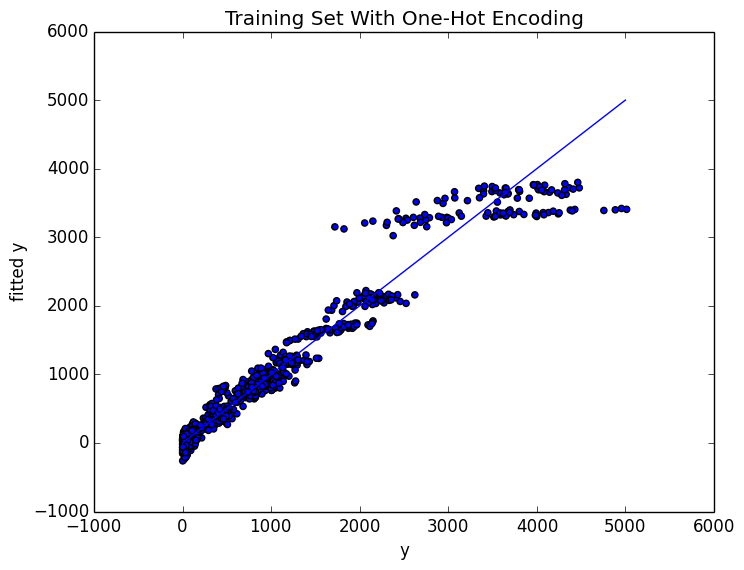

mean((y - yfit) .^ 2) = 40021.98084753233


PyObject <matplotlib.text.Text object at 0x31b8cf510>

In [77]:
yfit = X*w
@show mean((y-yfit).^2)
PyPlot.scatter(y,yfit)
PyPlot.plot(1:5000,1:5000)
PyPlot.xlabel("y")
PyPlot.ylabel("fitted y")
PyPlot.title("Training Set With One-Hot Encoding")

In [78]:
Xtest = hcat(convert(Array{Float64,2},onehottestdata[:,6:46]),convert(Array{Float64,2},onehottestdata[:,48:59]))

359×53 Array{Float64,2}:
 0.062  87.5  1608.9  228.1  154.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.062  87.5  1608.9  228.1  154.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.062  87.5  1608.9  228.1  154.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.062  87.5  1608.9  228.1  154.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.062  87.5  1608.9  228.1  154.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.062  87.5  1608.9  228.1  154.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.062  87.5  1608.9  228.1  154.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.062  87.5  1608.9  228.1  154.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.062  87.5  1608.9  228.1  154.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.062  87.5  1608.9  228.1  154.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.062  87.5  1608.9  228.1  154.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.062  87.5  1608.9  228.1  154.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.062  87.5  1608.9  228.1  154.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        

In [58]:
Xtest[:,33:53]

359×21 Array{Float64,2}:
 49.129   32.3548  40.7419   7.79355   …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 49.129   32.3548  40.7419   7.79355      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 49.129   32.3548  40.7419   7.79355      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 49.129   32.3548  40.7419   7.79355      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 49.129   32.3548  40.7419   7.79355      0.0  0.0  0.0  0.0  0.0  0.0  0.0
 43.4286  27.7857  35.6071  -0.15      …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 43.4286  27.7857  35.6071  -0.15         0.0  0.0  0.0  0.0  0.0  0.0  0.0
 43.4286  27.7857  35.6071  -0.15         0.0  0.0  0.0  0.0  0.0  0.0  0.0
 53.4516  35.5484  44.5      0.945161     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 53.4516  35.5484  44.5      0.945161     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 53.4516  35.5484  44.5      0.945161  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 53.4516  35.5484  44.5      0.945161     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 53.4516  35.5484  44.5      0.945161     0.0  0.0  0.0  0.0  0

In [51]:
size(Xtestafterscaling)[1]

359

In [79]:
Xtestafterscaling = zeros(size(Xtest[:,1:16]))
for i = 1:7
    x = Xtest[:,i]
    Xtestafterscaling[:,i] = (x.-means[i])/sds[i]
end
for i = 1:9
    x = Xtest[:,(i+32)]
    Xtestafterscaling[:,(i+7)] = (x.-means[(i+7)])/sds[(i+7)]
end

In [80]:
Xtestafterscaling

359×16 Array{Float64,2}:
 -1.09473   0.681002   1.14809  …   0.0959294  -0.266898  -0.2537  
 -1.09473   0.681002   1.14809      0.0959294  -0.266898  -0.2537  
 -1.09473   0.681002   1.14809      0.0959294  -0.266898  -0.2537  
 -1.09473   0.681002   1.14809      0.0959294  -0.266898  -0.2537  
 -1.09473   0.681002   1.14809      0.0959294  -0.266898  -0.2537  
 -1.09473   0.681002   1.14809  …  -0.894214    1.35356    0.734546
 -1.09473   0.681002   1.14809     -0.894214    1.35356    0.734546
 -1.09473   0.681002   1.14809     -0.894214    1.35356    0.734546
 -1.09473   0.681002   1.14809     -1.1769     -0.3172    -0.2537  
 -1.09473   0.681002   1.14809     -1.1769     -0.3172    -0.2537  
 -1.09473   0.681002   1.14809  …  -1.1769     -0.3172    -0.2537  
 -1.09473   0.681002   1.14809     -1.1769     -0.3172    -0.2537  
 -1.09473   0.681002   1.14809     -1.1769     -0.3172    -0.2537  
  ⋮                             ⋱                          ⋮       
  1.16568  -1.73825   -

In [81]:
afterScaling

1440×16 Array{Float64,2}:
  1.11545   -0.275701  -1.17493    …  -0.18016    -0.3172     -0.2537  
  1.11545   -0.275701  -1.17493       -0.18016    -0.3172     -0.2537  
 -0.642645   0.153166   0.549752      -0.609139   -0.3172     -0.2537  
 -0.642645   0.153166   0.549752      -0.41407    -0.3172     -0.2537  
 -0.642645   0.153166   0.549752       0.173858   -0.3172     -0.2537  
  0.663366  -0.451647  -0.0272199  …  -0.913431    0.814604    0.242194
  0.663366  -0.451647  -0.0272199      0.281474   -0.3172     -0.2537  
  1.11545   -0.275701  -1.17493        0.344559   -0.3172     -0.2537  
  0.663366  -0.451647  -0.0272199     -1.16948     0.852331    0.588139
 -1.09473    0.681002   1.14809        0.77465    -0.3172     -0.2537  
 -1.09473    0.681002   1.14809    …  -0.716754   -0.3172     -0.2537  
 -1.14496    1.50575    0.922825       1.9557     -0.3172     -0.2537  
 -0.642645   0.153166   0.549752       0.0269069  -0.187252   -0.2537  
  ⋮                                ⋱  

In [82]:
Xtest = hcat(convert(Array{Float64,2},onehottestdata[:,13:37]),convert(Array{Float64,2},onehottestdata[:,47:59]),
Xtestafterscaling,ones(size(Xtestafterscaling)[1]))

359×55 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  -0.266898  -0.2537    1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     -0.266898  -0.2537    1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     -0.266898  -0.2537    1.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     -0.266898  -0.2537    1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     -0.266898  -0.2537    1.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …   1.35356    0.734546  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      1.35356    0.734546  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      1.35356    0.734546  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     -0.3172    -0.2537    1.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0     -0.3172    -0.2537    1.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  …  -0.3172    -0.2537    1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     -0.3172    -0.2537    1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     -0.3172    -0.2537    1.0


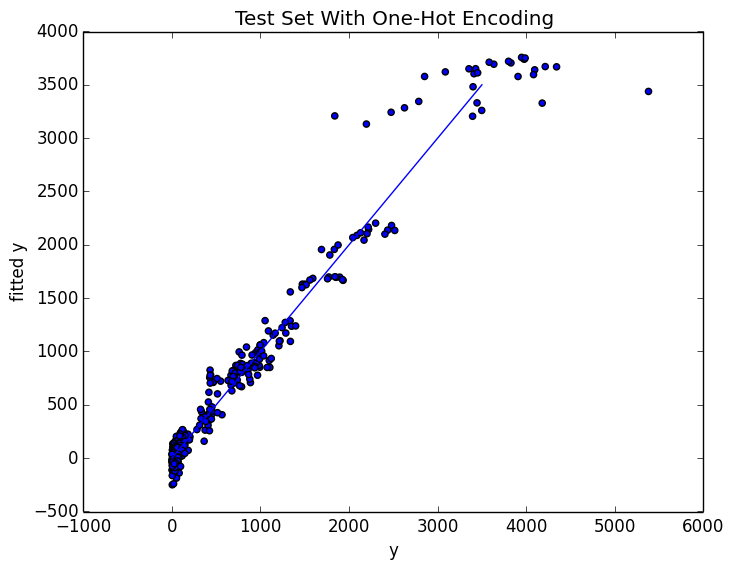

mean((ytest - yfittest) .^ 2) = 43081.8096483393


PyObject <matplotlib.text.Text object at 0x31fe61350>

In [85]:
ytest = onehottestdata[:x1].data;
yfittest = Xtest*w
@show mean((ytest - yfittest).^2)
PyPlot.scatter(ytest,yfittest)
PyPlot.plot(1:3500,1:3500)
PyPlot.xlabel("y")
PyPlot.ylabel("fitted y")
PyPlot.title("Test Set With One-Hot Encoding")

In [ ]:
a = sqrt(43081.8096483393)